<a href="https://colab.research.google.com/github/JQ100/project2/blob/main/project2part4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
# Import Libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
import pandas as pd

In [2]:
df = pd.read_csv('/content/superstore - superstore.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
# drop columns
df = df.drop(['Row ID', 'Ship Date', 'Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Discount', 'Profit', 'Product ID', 'Product Name', 'Sub-Category', 'Customer ID', 'Customer Name', 'Order ID', 'Order Date'], axis=1)
df.head()

,Region,Category,Sales,Quantity
0,South,Furniture,261.9600,2
1,South,Furniture,731.9400,3
2,West,Office Supplies,14.6200,2
3,South,Furniture,957.5775,5
4,South,Office Supplies,22.3680,2


In [4]:
df['Category'].value_counts()
# Encoding 'Category'
replacement_dictionary = {'Office Supplies':0, 'Furniture':1, 'Technology':2}
df['Category'].replace(replacement_dictionary, inplace=True)
df['Category'].value_counts()

0    6026
1    2121
2    1847
Name: Category, dtype: int64

In [5]:
df['Region'].value_counts()
# Encoding 'Region'
replacement_dictionary = {'West':0, 'East':1, 'Central':2, 'South':3}
df['Region'].replace(replacement_dictionary, inplace=True)
df['Region'].value_counts()

0    3203
1    2848
2    2323
3    1620
Name: Region, dtype: int64

In [6]:
# use regression because our target variable sales is continuous
# Model 1 - Regression Tree
le = LabelEncoder()
y = le.fit_transform(df['Sales'])
X = df.drop(columns = 'Sales')
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [7]:
dec_tree = DecisionTreeRegressor(random_state = 42)
dec_tree.fit(X_train, y_train)
train_preds = dec_tree.predict(X_train)
test_preds = dec_tree.predict(X_test)

# evaluate the model
train_score = dec_tree.score(X_train, y_train)
test_score = dec_tree.score(X_test, y_test)
print(train_score)
print(test_score)

0.34221938654465756
0.3236076277540696


In [8]:
# Looking at options for tuning this model
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [9]:
# finding the optimal max_depth - hyperparameter tuning
# List of values to try for max_depth:
depths = list(range(2, 36)) # will try every value between 2 and 36
# Data frame to store the score for each value of max_depth:
scores = pd.DataFrame(index=depths, columns=['Test Score','Train Score'])
for depth in depths:
    dec_tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    dec_tree.fit(X_train, y_train)
    train_score = dec_tree.score(X_test, y_test)
    test_score = dec_tree.score(X_test, y_test)
    scores.loc[depth, 'Train Score'] = train_score
    scores.loc[depth, 'Test Score'] = test_score

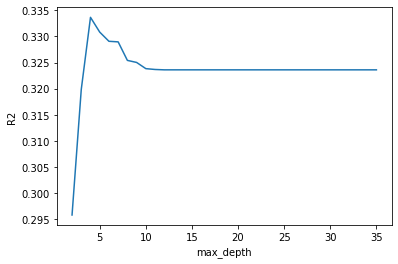

In [10]:
# Visualize which max_depth leads to the highest r2 score
import matplotlib.pyplot as plt
plt.plot(depths, scores['Test Score'])
plt.xlabel('max_depth')
plt.ylabel('R2');

In [11]:
sorted_scores = scores.sort_values(by='Test Score', ascending=False)
sorted_scores.head()

,Test Score,Train Score
4,0.333666,0.333666
5,0.330838,0.330838
6,0.329076,0.329076
7,0.328966,0.328966
8,0.325418,0.325418


In [12]:
# Let's run the model with our optimized value for max_depth
dec_tree_4 = DecisionTreeRegressor(max_depth = 4, random_state = 42)
dec_tree_4.fit(X_train, y_train)
train_4_score = dec_tree_4.score(X_train, y_train)
test_4_score = dec_tree_4.score(X_test, y_test)
print(train_4_score)
print(test_4_score)

0.3305852699781824
0.33366647423004836


In [13]:
# Model 2 - Random Forest Tree
rf = RandomForestRegressor(random_state = 42)
# Looking at some hyperparameters that seem tunable
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [14]:
rf.fit(X_train, y_train)
rf.predict(X_test)
rf_train_score = rf.score(X_train, y_train)
rf_test_score = rf.score(X_test, y_test)
print(rf_train_score)
print(rf_test_score)

0.3419060241816375
0.32478097129357786


In [15]:
# finding best max_depth
est_depths = [estimator.get_depth() for estimator in rf.estimators_]
depths = range(1, max(est_depths))
scores = pd.DataFrame(index=depths, columns=['Test Score'])
for depth in depths:    
   model = RandomForestRegressor(max_depth=depth)
   model.fit(X_train, y_train)
   scores.loc[depth, 'Train Score'] = model.score(X_train, y_train)
   scores.loc[depth, 'Test Score'] = model.score(X_test, y_test)
   scores.head()

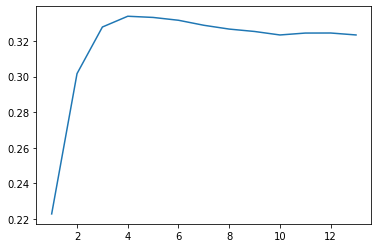

In [16]:
plt.plot(scores['Test Score'])

In [17]:
sorted_scores = scores.sort_values(by='Test Score', ascending=False)
sorted_scores.head()

,Test Score,Train Score
4,0.333868,0.332612
5,0.333199,0.335878
6,0.331608,0.338143
7,0.328793,0.339875
3,0.327816,0.327865


In [18]:
# At max_depth = 4
rf_4 = RandomForestRegressor(max_depth = 4, random_state = 42)
rf_4.fit(X_train, y_train)
rf_4_train_score = rf_4.score(X_train, y_train)
rf_4_test_score = rf_4.score(X_test, y_test)
print(rf_4_train_score)
print(rf_4_test_score)

0.33269223019567074
0.3337648446665975


In [19]:
# let's also tune n_estimators
n_ests = [50, 100, 150, 200, 250]
scores2 = pd.DataFrame(index=n_ests, columns=['Test Score', 'Train Score'])
for n in n_ests:
   model = RandomForestRegressor(max_depth=29, n_estimators=n)
   model.fit(X_train, y_train)
   scores2.loc[n, 'Train Score'] = model.score(X_train, y_train)
   scores2.loc[n, 'Test Score'] = model.score(X_test, y_test)
scores2.head()

,Test Score,Train Score
50,0.324156,0.34181
100,0.324324,0.341905
150,0.323603,0.341932
200,0.323826,0.341978
250,0.323549,0.342009


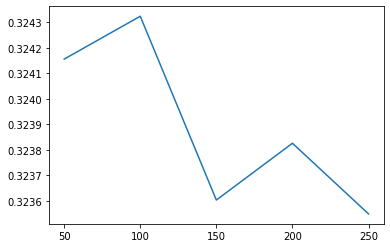

In [20]:
plt.plot(scores2['Test Score'])
plt.xticks(n_ests);

In [21]:
sorted_scores2 = scores2.sort_values(by='Test Score', ascending=False)
sorted_scores2.head()

,Test Score,Train Score
100,0.324324,0.341905
50,0.324156,0.34181
200,0.323826,0.341978
150,0.323603,0.341932
250,0.323549,0.342009


By tweaking the max_depth parameter in our decision tree model, we were able to bring our training and test results higher. And in our random forest model, doing so allows us to bring the training and testing scores closer together, a sign we have reduced overfitting. We also tweaked the number of estimators, from which we hardly notice any improvement. 

In [22]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
scaled_df = scaler.fit_transform(X)


In [23]:
# Instantiate & fit data using PCA
pca = PCA()
pca.fit(scaled_df)

PCA()

Text(0, 0.5, 'Proportion of Explained Variance')

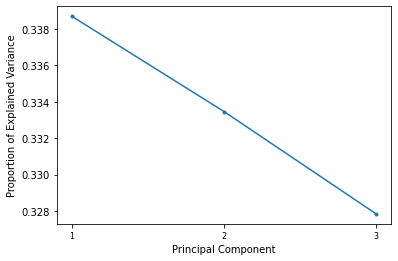

In [24]:
# Plot the explained variance ratios of the first few principal components
plt.plot(range(1, 4), pca.explained_variance_ratio_, marker = '.')
plt.xticks(ticks = range(1, 4), fontsize=8)
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Explained Variance')

In [42]:
# Create a transformer pipeline
# We choose n = 1 because although there isn't an obvious elbow, there is a great proportion of explained variance at 1.
transformer = make_pipeline(StandardScaler(), PCA(n_components=1))

In [45]:
logreg = LogisticRegression()
# Create a modeling pipeline
logreg_pipe = make_pipeline(transformer, logreg)
logreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('standardscaler', StandardScaler()),
                                 ('pca', PCA(n_components=1))])),
                ('logisticregression', LogisticRegression())])

In [46]:
print('Training accuracy:', logreg_pipe.score(X_train, y_train))
print('Testing accuracy:', logreg_pipe.score(X_test, y_test))

Training accuracy: 0.007738492328218813
Testing accuracy: 0.004401760704281713


In [47]:
# Let's see if feature engineering influences our models.
# Model 1 - Regression Tree
# use regression because our target variable sales is continuous
le = LabelEncoder()
y = le.fit_transform(df['Sales'])
X = df.drop(columns = 'Sales')
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [48]:
dec_tree = DecisionTreeRegressor(random_state = 42)
dec_tree.fit(X_train, y_train)
train_preds = dec_tree.predict(X_train)
test_preds = dec_tree.predict(X_test)

# evaluate the model
train_score = dec_tree.score(X_train, y_train)
test_score = dec_tree.score(X_test, y_test)
print(train_score)
print(test_score)

0.34221938654465756
0.3236076277540696


In [49]:
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [50]:
# finding the optimal max_depth - hyperparameter tuning
# List of values to try for max_depth:
depths = list(range(2, 36)) # will try every value between 2 and 36
# Data frame to store the score for each value of max_depth:
scores = pd.DataFrame(index=depths, columns=['Test Score','Train Score'])
for depth in depths:
    dec_tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    dec_tree.fit(X_train, y_train)
    train_score = dec_tree.score(X_test, y_test)
    test_score = dec_tree.score(X_test, y_test)
    scores.loc[depth, 'Train Score'] = train_score
    scores.loc[depth, 'Test Score'] = test_score

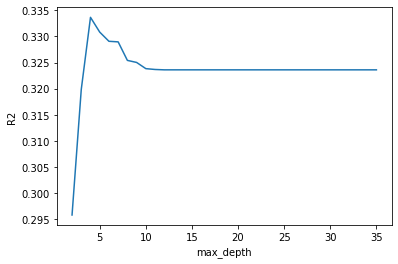

In [51]:
# Visualize which max_depth leads to the highest r2 score
import matplotlib.pyplot as plt
plt.plot(depths, scores['Test Score'])
plt.xlabel('max_depth')
plt.ylabel('R2');

In [52]:
sorted_scores = scores.sort_values(by='Test Score', ascending=False)
sorted_scores.head()

,Test Score,Train Score
4,0.333666,0.333666
5,0.330838,0.330838
6,0.329076,0.329076
7,0.328966,0.328966
8,0.325418,0.325418


In [53]:
# Let's run the model with our optimized value for max_depth
dec_tree_4 = DecisionTreeRegressor(max_depth = 4, random_state = 42)
dec_tree_4.fit(X_train, y_train)
train_4_score = dec_tree_4.score(X_train, y_train)
test_4_score = dec_tree_4.score(X_test, y_test)
print(train_4_score)
print(test_4_score)

0.3305852699781824
0.33366647423004836


Before we re-evaluate our second model, we can see there is a dramatic change after the feature engineering step to our regression tree model. At the new max depth of 4, the training and test scores are closer together, which is a good sign that we have reduced overfitting.

In [54]:
# Model 2 - Random Forest Tree
rf = RandomForestRegressor(random_state = 42)
# Looking at some hyperparameters that seem tunable
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [55]:
rf.fit(X_train, y_train)
rf.predict(X_test)
rf_train_score = rf.score(X_train, y_train)
rf_test_score = rf.score(X_test, y_test)
print(rf_train_score)
print(rf_test_score)

0.3419060241816375
0.32478097129357786


In [56]:
# finding best max_depth
est_depths = [estimator.get_depth() for estimator in rf.estimators_]
depths = range(1, max(est_depths))
scores = pd.DataFrame(index=depths, columns=['Test Score'])
for depth in depths:    
   model = RandomForestRegressor(max_depth=depth)
   model.fit(X_train, y_train)
   scores.loc[depth, 'Train Score'] = model.score(X_train, y_train)
   scores.loc[depth, 'Test Score'] = model.score(X_test, y_test)
   scores.head()

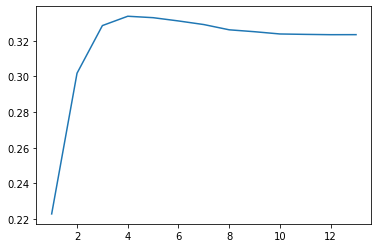

In [57]:
plt.plot(scores['Test Score'])

In [58]:
sorted_scores = scores.sort_values(by='Test Score', ascending=False)
sorted_scores.head()

,Test Score,Train Score
4,0.333746,0.332532
5,0.332938,0.335953
6,0.331105,0.338167
7,0.329079,0.339728
3,0.328511,0.328151


In [59]:
# At max_depth = 4
rf_4 = RandomForestRegressor(max_depth = 4, random_state = 42)
rf_4.fit(X_train, y_train)
rf_4_train_score = rf_4.score(X_train, y_train)
rf_4_test_score = rf_4.score(X_test, y_test)
print(rf_4_train_score)
print(rf_4_test_score)

0.33269223019567074
0.3337648446665975


In [60]:
# let's also tune n_estimators
n_ests = [50, 100, 150, 200, 250]
scores2 = pd.DataFrame(index=n_ests, columns=['Test Score', 'Train Score'])
for n in n_ests:
   model = RandomForestRegressor(max_depth=29, n_estimators=n)
   model.fit(X_train, y_train)
   scores2.loc[n, 'Train Score'] = model.score(X_train, y_train)
   scores2.loc[n, 'Test Score'] = model.score(X_test, y_test)
scores2.head()

,Test Score,Train Score
50,0.324151,0.341801
100,0.324488,0.341903
150,0.324042,0.341937
200,0.323511,0.341976
250,0.324072,0.341974


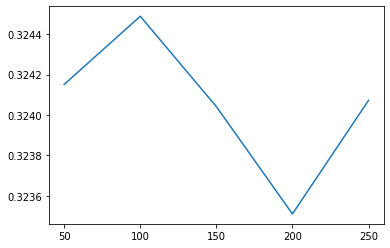

In [61]:
plt.plot(scores2['Test Score'])
plt.xticks(n_ests);

In [62]:
sorted_scores2 = scores2.sort_values(by='Test Score', ascending=False)
sorted_scores2.head()

,Test Score,Train Score
100,0.324488,0.341903
50,0.324151,0.341801
250,0.324072,0.341974
150,0.324042,0.341937
200,0.323511,0.341976


After our PCA step, we can see our training and test data have slight changes, and are still close together. However, the accuracy scores of the training/test data are concerning, as they're both near to none.

I choose the post-PCA decision tree as my production model because the training and test scores are very close together, a sign we have reduced overfitting. The chart also looks stable.